In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../../")
from DanceProj1.DanceObj import Dance

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from DanceProj1.data_proc_windowed import get_data, create_windows, data_to_windowed_features

aistpath = '../../aist_keypoints' #path to 3d keypoints data
dataBM, dataFM = get_data(aistpath)    #get data. Comes with joint-position-frame arrays and an id

In [4]:
print('data is dict with keys = genres', dataBM.keys())
print('values are tuples (pairs) = (posdata, id)')
print('first break piece data shape (frames, joints, xyz):', dataBM['Break'][0][0].shape)
print('id of first break piece: ', dataBM['Break'][0][1])

data is dict with keys = genres dict_keys(['Break', 'Pop', 'Lock', 'Midhop', 'LAhop', 'House', 'Waack', 'Krump', 'Street Jazz', 'Ballet Jazz'])
values are tuples (pairs) = (posdata, id)
first break piece data shape (frames, joints, xyz): (15, 443, 3)
id of first break piece:  gBR_sBM_cAll_d05_mBR5_ch10


In [5]:
#make sure create_windows works
dummy_sequence = np.random.rand(15, 500, 3)
windows = create_windows(dummy_sequence)
windows.keys()

dict_keys([120])

In [6]:
dfBM, dfFM = data_to_windowed_features(dataBM, dataFM)

There were index errors on 0 windows


In [7]:
print("Shape of dfBM:", dfBM.shape)
print("Shape of dfFM:", dfFM.shape)
print("First few rows of dfBM:")
print(dfBM.head())
print("First few rows of dfFM:")
print(dfFM.head())

Shape of dfBM: (18202, 21)
Shape of dfFM: (13815, 21)
First few rows of dfBM:
   window size  window number                          id  Genre  sacrum_std  \
0          120              0  gBR_sBM_cAll_d05_mBR5_ch10  Break    3.548498   
1          120              1  gBR_sBM_cAll_d05_mBR5_ch10  Break    3.323013   
2          120              2  gBR_sBM_cAll_d05_mBR5_ch10  Break    3.661766   
3          120              3  gBR_sBM_cAll_d05_mBR5_ch10  Break    3.943580   
4          120              4  gBR_sBM_cAll_d05_mBR5_ch10  Break    3.940493   

   sacrum_jerkiness  sacrum_bounciness  angularmomentumxz  angularmomentumy  \
0        770.476368         -29.221295        1046.071843       -632.467442   
1        800.204884          24.294110        1407.504616       -994.279042   
2        770.670579         -86.055092        1119.550381       -486.717637   
3        703.156638         -70.889571         790.133782       -681.613665   
4        825.722096          -7.703902        

In [8]:
dfBM.columns

Index(['window size', 'window number', 'id', 'Genre', 'sacrum_std',
       'sacrum_jerkiness', 'sacrum_bounciness', 'angularmomentumxz',
       'angularmomentumy', 'angularmomentumxzstd', 'angularmomentumystd',
       'ypeaks', 'xzpeaks', 'wrist_acceleration', 'wrist_accel_std',
       'ankle_acceleration', 'ankle_accel_std', 'ankle_height',
       'ankle_height_std', 'expandedness', 'expandedness_std'],
      dtype='object')

/home/tbenbaker/miniconda3/envs/kinem/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tbenbaker/miniconda3/envs/kinem/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


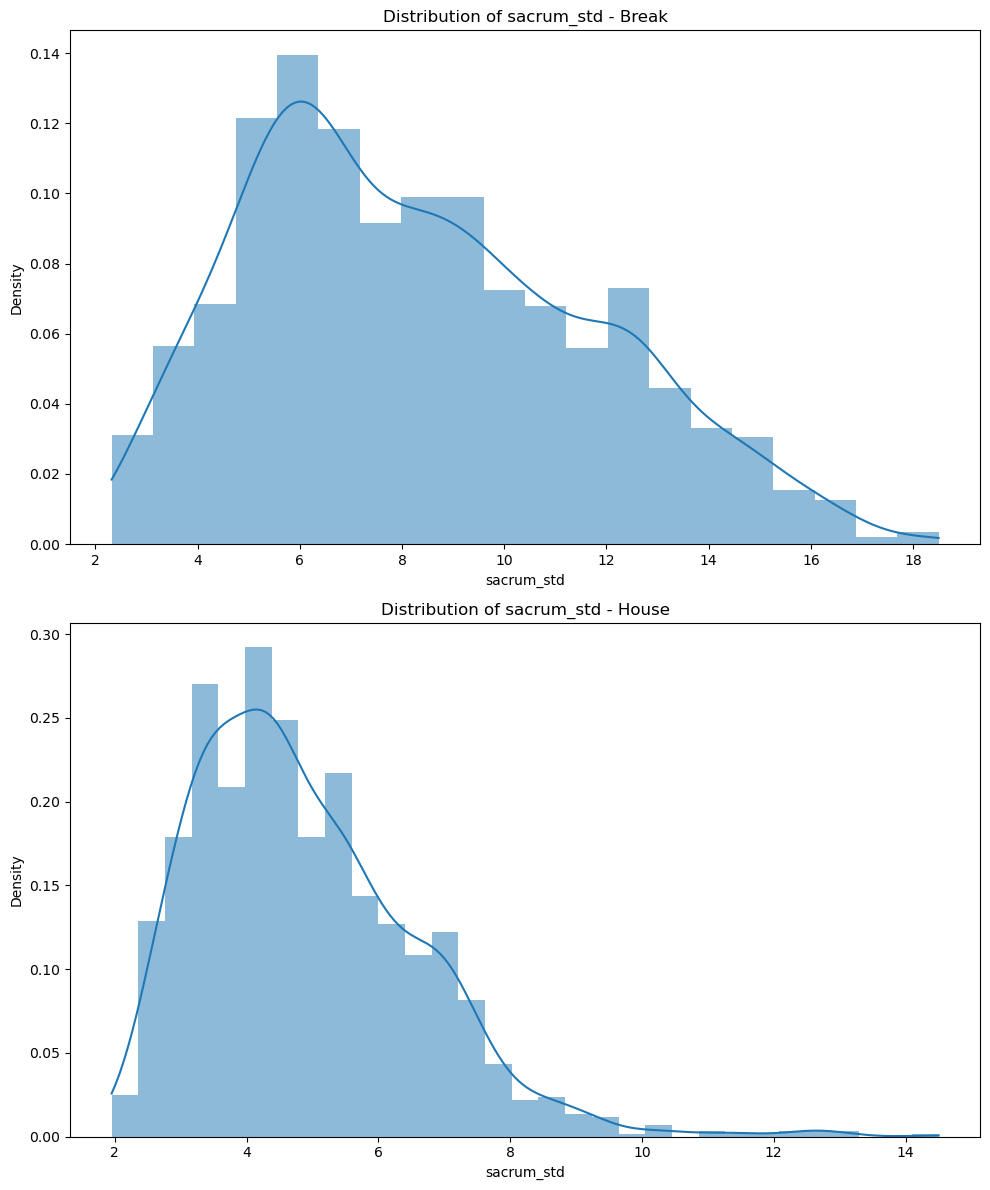

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose the genre you're interested in
selected_genre1 = 'Break'  # Example genre
selected_genre2 = 'House'  # Example genre
selected_feature = 'sacrum_std'  # Example feature

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Filter the dataframe for the selected genre
genre_data1 = dfBM[dfBM['Genre'] == selected_genre1]

# Plotting the distribution for a specific feature within the selected genre
sns.histplot(genre_data1[selected_feature], kde=True, stat="density", linewidth=0, ax=axs[0])
axs[0].set_title(f'Distribution of {selected_feature} - {selected_genre1}')
axs[0].set_xlabel(f'{selected_feature}')
axs[0].set_ylabel('Density')

# repeat for genre2
genre_data2 = dfBM[dfBM['Genre'] == selected_genre2]

# Plotting the distribution for a specific feature within the selected genre
sns.histplot(genre_data2[selected_feature], kde=True, stat="density", linewidth=0, ax=axs[1])
axs[1].set_title(f'Distribution of {selected_feature} - {selected_genre2}')
axs[1].set_xlabel(f'{selected_feature}')
axs[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

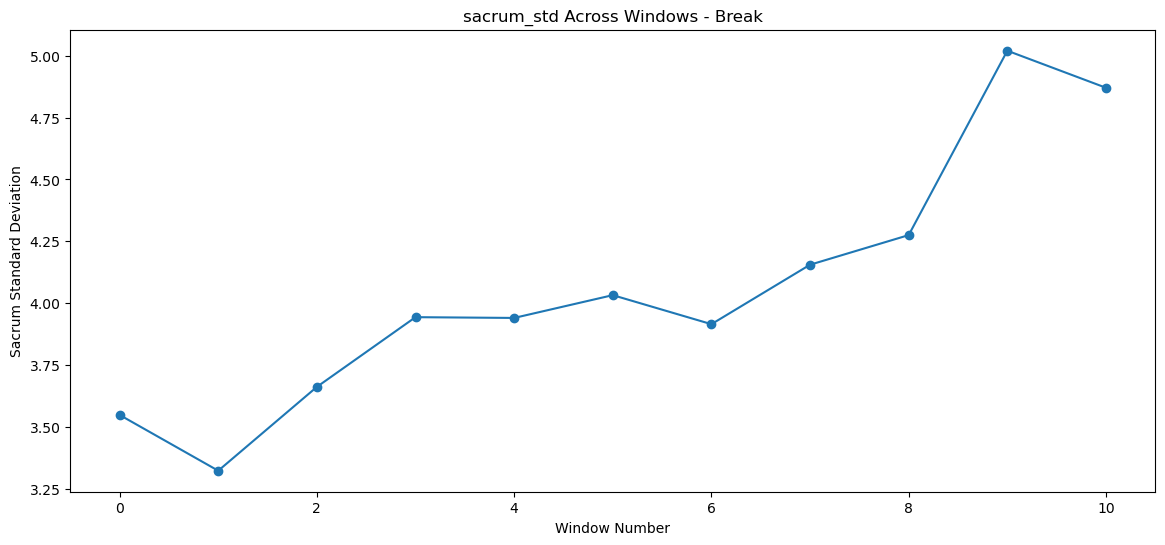

In [12]:
# Assuming 'id' uniquely identifies a dance sequence and 'window number' is sequential and unique per sequence
# Filter genre_data for a single dance ID as an example
example_sequence_id = genre_data1['id'].unique()[0]
example_sequence = genre_data1[genre_data1['id'] == example_sequence_id]

plt.figure(figsize=(14, 6))
plt.plot(example_sequence['window number'], example_sequence[selected_feature], marker='o', linestyle='-')
plt.title(f'{selected_feature} Across Windows - {selected_genre1}')
plt.xlabel('Window Number')
plt.ylabel('Sacrum Standard Deviation')
plt.show()
